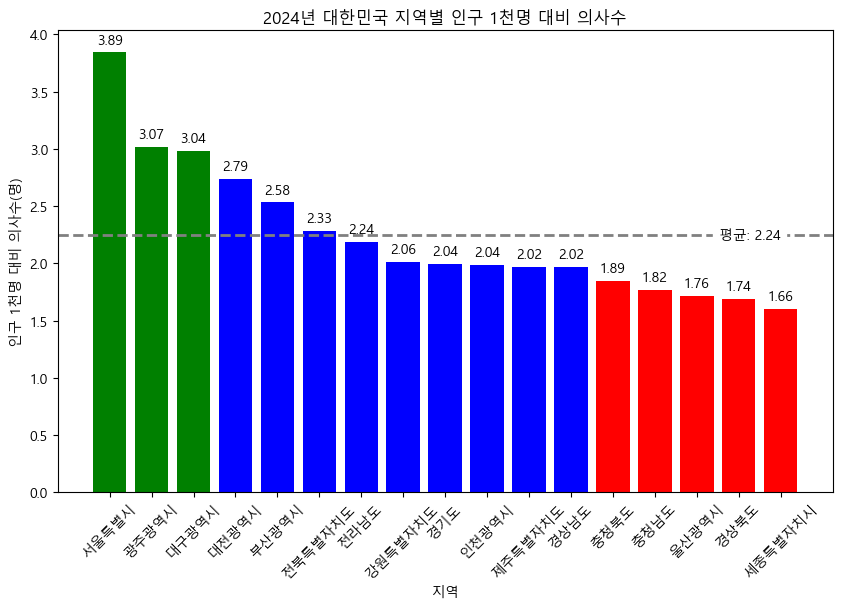

In [58]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 현재 작업 디렉토리를 가져옴
current_dir = os.getcwd()

file_path = os.path.join(current_dir, 'datas', '01_2024_kr_phNum.xlsx')

df = pd.read_excel(file_path)
df['인구 1천명 대비 의사수'] = df['인구 1만명 대비 의사수'] / 10
asc_df = df.sort_values(by='인구 1천명 대비 의사수', ascending=False)

# 평균값 계산
mean_value = df['인구 1천명 대비 의사수'].mean()

plt.figure(figsize=(10,6))
colors = ['red' if value < 1.9 else 'green' if value > 2.9 else 'blue' for value in asc_df['인구 1천명 대비 의사수']]
bars = plt.bar(asc_df['이름'], asc_df['인구 1천명 대비 의사수'], color=colors)
plt.xlabel('지역')
plt.ylabel('인구 1천명 대비 의사수(명)')
plt.title('2024년 대한민국 지역별 인구 1천명 대비 의사수')

# 평균값을 가로선으로 표시하고 텍스트 추가
plt.axhline(y=mean_value, color='gray', linestyle='--', linewidth=2)
plt.text(len(asc_df)-1, mean_value, f'평균: {mean_value:.2f}', va='center', ha='right', backgroundcolor='white')

plt.xticks(rotation=45)

for bar in bars :
    yval = bar.get_height() + 0.05
    plt.text(bar.get_x() + bar.get_width() / 2 , yval, round(yval,2), ha = 'center', va = 'bottom')
plt.show()

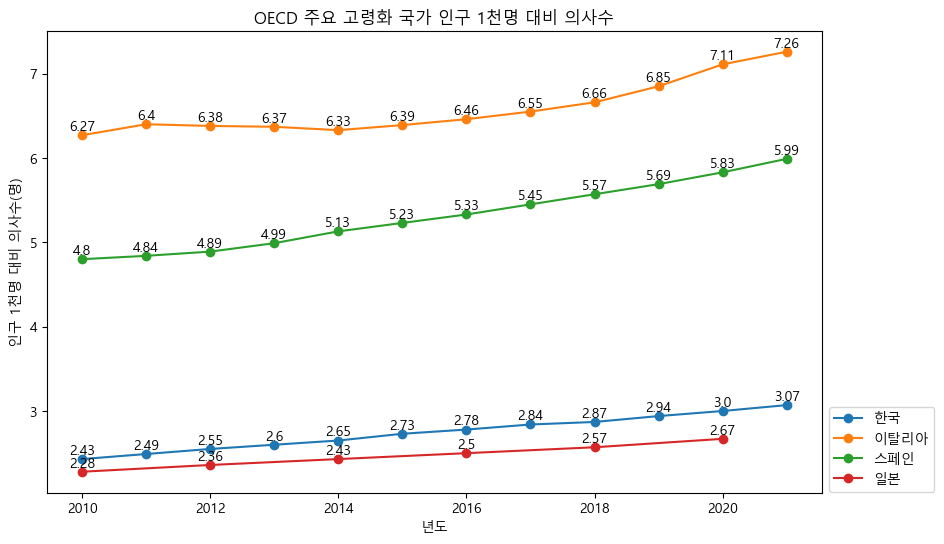

In [83]:
font_path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

current_dir = os.getcwd()
file_path = os.path.join(current_dir, 'datas', '02_oecd_physicians.csv')

df = pd.read_csv(file_path) # 원본 데이터
fi_df0 = df[df['Measure'] == 'Density per 1 000 population (head counts)'] # 천명당 의사수 필터링
fi_df = fi_df0[fi_df0['Variable'] == 'Physicians licensed to practice'] # 전체의사수 필터링
fi_jp_df = fi_df0[fi_df0['Variable'] == 'Professionally active physicians'] # 일본만 다름

col = ['COU','YEA','Value']

kor_df = fi_df[fi_df['COU'] == 'KOR'] # 한국
ita_df = fi_df[fi_df['COU'] == 'ITA'] # 이탈리아
esp_df = fi_df[fi_df['COU'] == 'ESP'] # 스페인
jpn_df = fi_jp_df[fi_jp_df['COU'] == 'JPN'] # 일본

plt.figure(figsize=(10,6))

plt.plot(kor_df['YEA'], kor_df['Value'].astype(float), marker='o', label='한국')
for i, txt in enumerate(kor_df['Value']):
    plt.text(kor_df['YEA'].iloc[i], kor_df['Value'].astype(float).iloc[i] + 0.02, txt, ha='center', va='bottom')

plt.plot(ita_df['YEA'], ita_df['Value'].astype(float), marker='o', label='이탈리아')
for i, txt in enumerate(ita_df['Value']):
    plt.text(ita_df['YEA'].iloc[i], ita_df['Value'].astype(float).iloc[i] + 0.02, txt, ha='center', va='bottom')

plt.plot(esp_df['YEA'], esp_df['Value'].astype(float), marker='o', label='스페인')
for i, txt in enumerate(esp_df['Value']):
    plt.text(esp_df['YEA'].iloc[i], esp_df['Value'].astype(float).iloc[i] + 0.02, txt, ha='center', va='bottom')

plt.plot(jpn_df['YEA'], jpn_df['Value'].astype(float), marker='o', label='일본')
for i, txt in enumerate(jpn_df['Value']):
    plt.text(jpn_df['YEA'].iloc[i], jpn_df['Value'].astype(float).iloc[i] + 0.02, txt, ha='center', va='bottom')

plt.legend(loc='upper left', bbox_to_anchor=(1,0.2))

plt.title('OECD 주요 고령화 국가 인구 1천명 대비 의사수')
plt.xlabel('년도')
plt.ylabel('인구 1천명 대비 의사수(명)')
plt.show()

<>:46: SyntaxWarning: invalid escape sequence '\$'
<>:48: SyntaxWarning: invalid escape sequence '\$'
<>:50: SyntaxWarning: invalid escape sequence '\$'
<>:51: SyntaxWarning: invalid escape sequence '\$'
<>:52: SyntaxWarning: invalid escape sequence '\$'
<>:53: SyntaxWarning: invalid escape sequence '\$'
<>:54: SyntaxWarning: invalid escape sequence '\$'
<>:46: SyntaxWarning: invalid escape sequence '\$'
<>:48: SyntaxWarning: invalid escape sequence '\$'
<>:50: SyntaxWarning: invalid escape sequence '\$'
<>:51: SyntaxWarning: invalid escape sequence '\$'
<>:52: SyntaxWarning: invalid escape sequence '\$'
<>:53: SyntaxWarning: invalid escape sequence '\$'
<>:54: SyntaxWarning: invalid escape sequence '\$'
C:\Users\user\AppData\Local\Temp\ipykernel_15452\2682735627.py:46: SyntaxWarning: invalid escape sequence '\$'
  plt.plot(korea_data['YEA'], korea_data['Value'].replace('[\$,]', '', regex=True).astype(float), marker='o', label = '한국')
C:\Users\user\AppData\Local\Temp\ipykernel_15452\26

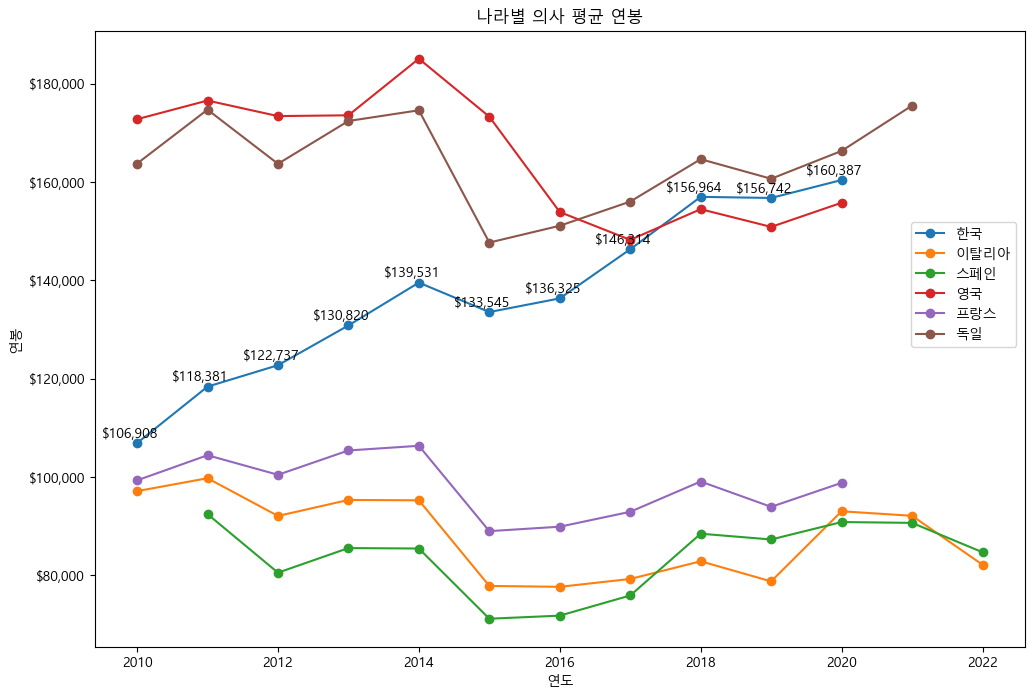

In [139]:
font_path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

current_dir = os.getcwd()
file_path = os.path.join(current_dir, 'datas', '03_salary_doc_oecd.csv')

df = pd.read_csv(file_path)

def t_s(x,pos):
    return '${:,.0f}'.format(x)

formatter = FuncFormatter(t_s)

# 'Country' 열이 한국(Korea)인 데이터만 필터링하여 출력
korea_data = df[df['Country'] == 'Korea']

ita_d = df[df['COU'] == 'ITA'] # 이탈리아
esp_d = df[df['COU'] == 'ESP'] # 스페인
uk_d = df[df['COU'] == 'GBR'] # 영국

fra_d = df[df['COU'] == 'FRA'] # 프랑스
ger_d = df[df['COU'] == 'DEU'] # 독일

# 'Value' 열의 데이터를 세 자리마다 쉼표(,)를 넣어서 표시하고, 앞에 달러 표시($)를 붙여서 출력
korea_data['Value'] = korea_data['Value'].map('${:,.0f}'.format)

ita_d['Value'] = ita_d['Value'].map('${:,.0f}'.format)
esp_d['Value'] = esp_d['Value'].map('${:,.0f}'.format)
uk_d['Value'] = uk_d['Value'].map('${:,.0f}'.format)
fra_d['Value'] = fra_d['Value'].map('${:,.0f}'.format)
ger_d['Value'] = ger_d['Value'].map('${:,.0f}'.format)

plt.figure(figsize=(12, 8))
plt.plot(korea_data['YEA'], korea_data['Value'].replace('[\$,]', '', regex=True).astype(float), marker='o', label = '한국')
for i, txt in enumerate(korea_data['Value']):
    plt.annotate(txt, (korea_data['YEA'].iloc[i] - 0.5, korea_data['Value'].replace('[\$,]', '', regex=True).astype(float).iloc[i]+1200))

plt.plot(ita_d['YEA'], ita_d['Value'].replace('[\$,]', '', regex=True).astype(float), marker='o', label = '이탈리아')
plt.plot(esp_d['YEA'], esp_d['Value'].replace('[\$,]', '', regex=True).astype(float), marker='o', label = '스페인')
plt.plot(uk_d['YEA'], uk_d['Value'].replace('[\$,]', '', regex=True).astype(float), marker='o', label = '영국')
plt.plot(fra_d['YEA'], fra_d['Value'].replace('[\$,]', '', regex=True).astype(float), marker='o', label = '프랑스')
plt.plot(ger_d['YEA'], ger_d['Value'].replace('[\$,]', '', regex=True).astype(float), marker='o', label = '독일')

plt.gca().yaxis.set_major_formatter(formatter)

plt.legend(loc='upper left', bbox_to_anchor=(0.87,0.7))

plt.title('나라별 의사 평균 연봉')
plt.xlabel('연도')
plt.ylabel('연봉')
plt.show()

